[View in Colaboratory](https://colab.research.google.com/github/msrdinesh/MNIST_using_various_algorithms/blob/master/MNIST.ipynb)

In [0]:
#import the essential packages
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [0]:
#importing the data
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()




In [168]:
#examining the shapes of data
print(np.shape(X_train[25]))
np.size(Y_train)

(28, 28)


60000

label 2


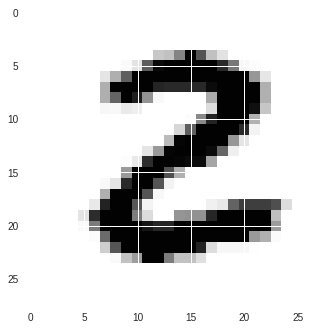

In [171]:
#checking a train example
plt.imshow(X_train[25])
print('label',Y_train[25])

label 0


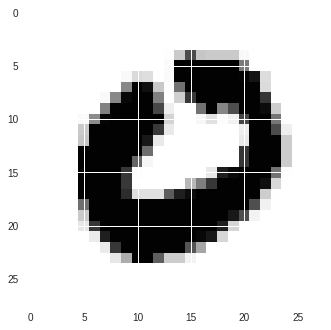

In [172]:
plt.imshow(X_test[25])
print('label',Y_test[25])

In [180]:
#one hot encoding
Y_train_arr = to_categorical(Y_train)
print(Y_train_arr[25])
print(Y_train_arr.shape)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
(60000, 10)


In [0]:
#reshaping the data
X_train = X_train.reshape(X_train.shape[0],28*28)/255



In [0]:
#neural network
model = Sequential()
model.add(Dense(50,activation='relu',input_shape=(28*28,)))
model.add(Dense(25,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [184]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x=X_train,y=Y_train_arr,epochs=10,verbose=2,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 3s - loss: 1.2398 - acc: 0.6100 - val_loss: 0.6932 - val_acc: 0.7950
Epoch 2/10
 - 3s - loss: 0.5997 - acc: 0.8214 - val_loss: 0.5057 - val_acc: 0.8567
Epoch 3/10
 - 3s - loss: 0.4696 - acc: 0.8660 - val_loss: 0.4244 - val_acc: 0.8812
Epoch 4/10
 - 3s - loss: 0.4105 - acc: 0.8824 - val_loss: 0.3804 - val_acc: 0.8910
Epoch 5/10
 - 3s - loss: 0.3775 - acc: 0.8928 - val_loss: 0.3593 - val_acc: 0.8946
Epoch 6/10
 - 3s - loss: 0.3535 - acc: 0.8987 - val_loss: 0.3363 - val_acc: 0.9019
Epoch 7/10
 - 3s - loss: 0.3352 - acc: 0.9044 - val_loss: 0.3226 - val_acc: 0.9077
Epoch 8/10
 - 3s - loss: 0.3185 - acc: 0.9082 - val_loss: 0.3131 - val_acc: 0.9074
Epoch 9/10
 - 3s - loss: 0.3043 - acc: 0.9132 - val_loss: 0.3009 - val_acc: 0.9126
Epoch 10/10
 - 3s - loss: 0.2913 - acc: 0.9165 - val_loss: 0.2906 - val_acc: 0.9142


In [185]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_18 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                260       
Total params: 40,785
Trainable params: 40,785
Non-trainable params: 0
_________________________________________________________________


In [195]:
#testing a data from test set
one_hot_predicted = model.predict(X_test[25].reshape(1,28*28))
predicted = np.argmax(one_hot_predicted)
print('predicted_label',predicted)

predicted_label 0


In [0]:
#testing own image
from PIL import Image
im = Image.open('path_of_file')
test=im.resize((28,28))


array is of shape (28, 28, 4)


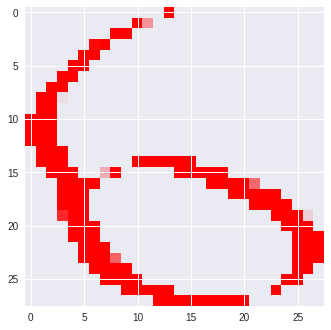

In [140]:
plt.imshow(test)
test_array = np.array(test)
print('array is of shape',test_array.shape)


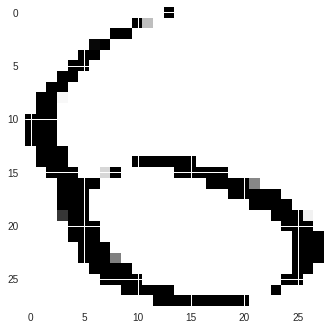

In [141]:
#taking a channel out of them
test_array= test_array[:,:,3]
plt.imshow(test_array)


In [0]:
#reshape the image
dinnu=test_array.reshape((1,28*28))

In [198]:
one_hot_encoded = model.predict(dinnu)
predict = np.argmax(one_hot_encoded)
print('predicted_label',predict)


predicted_label 3
